*Hello There!!!* 

***Hope to see you in a good health today.***

Today we will be going to work on the prediction of the quality of the wine given on the basis of some factors.

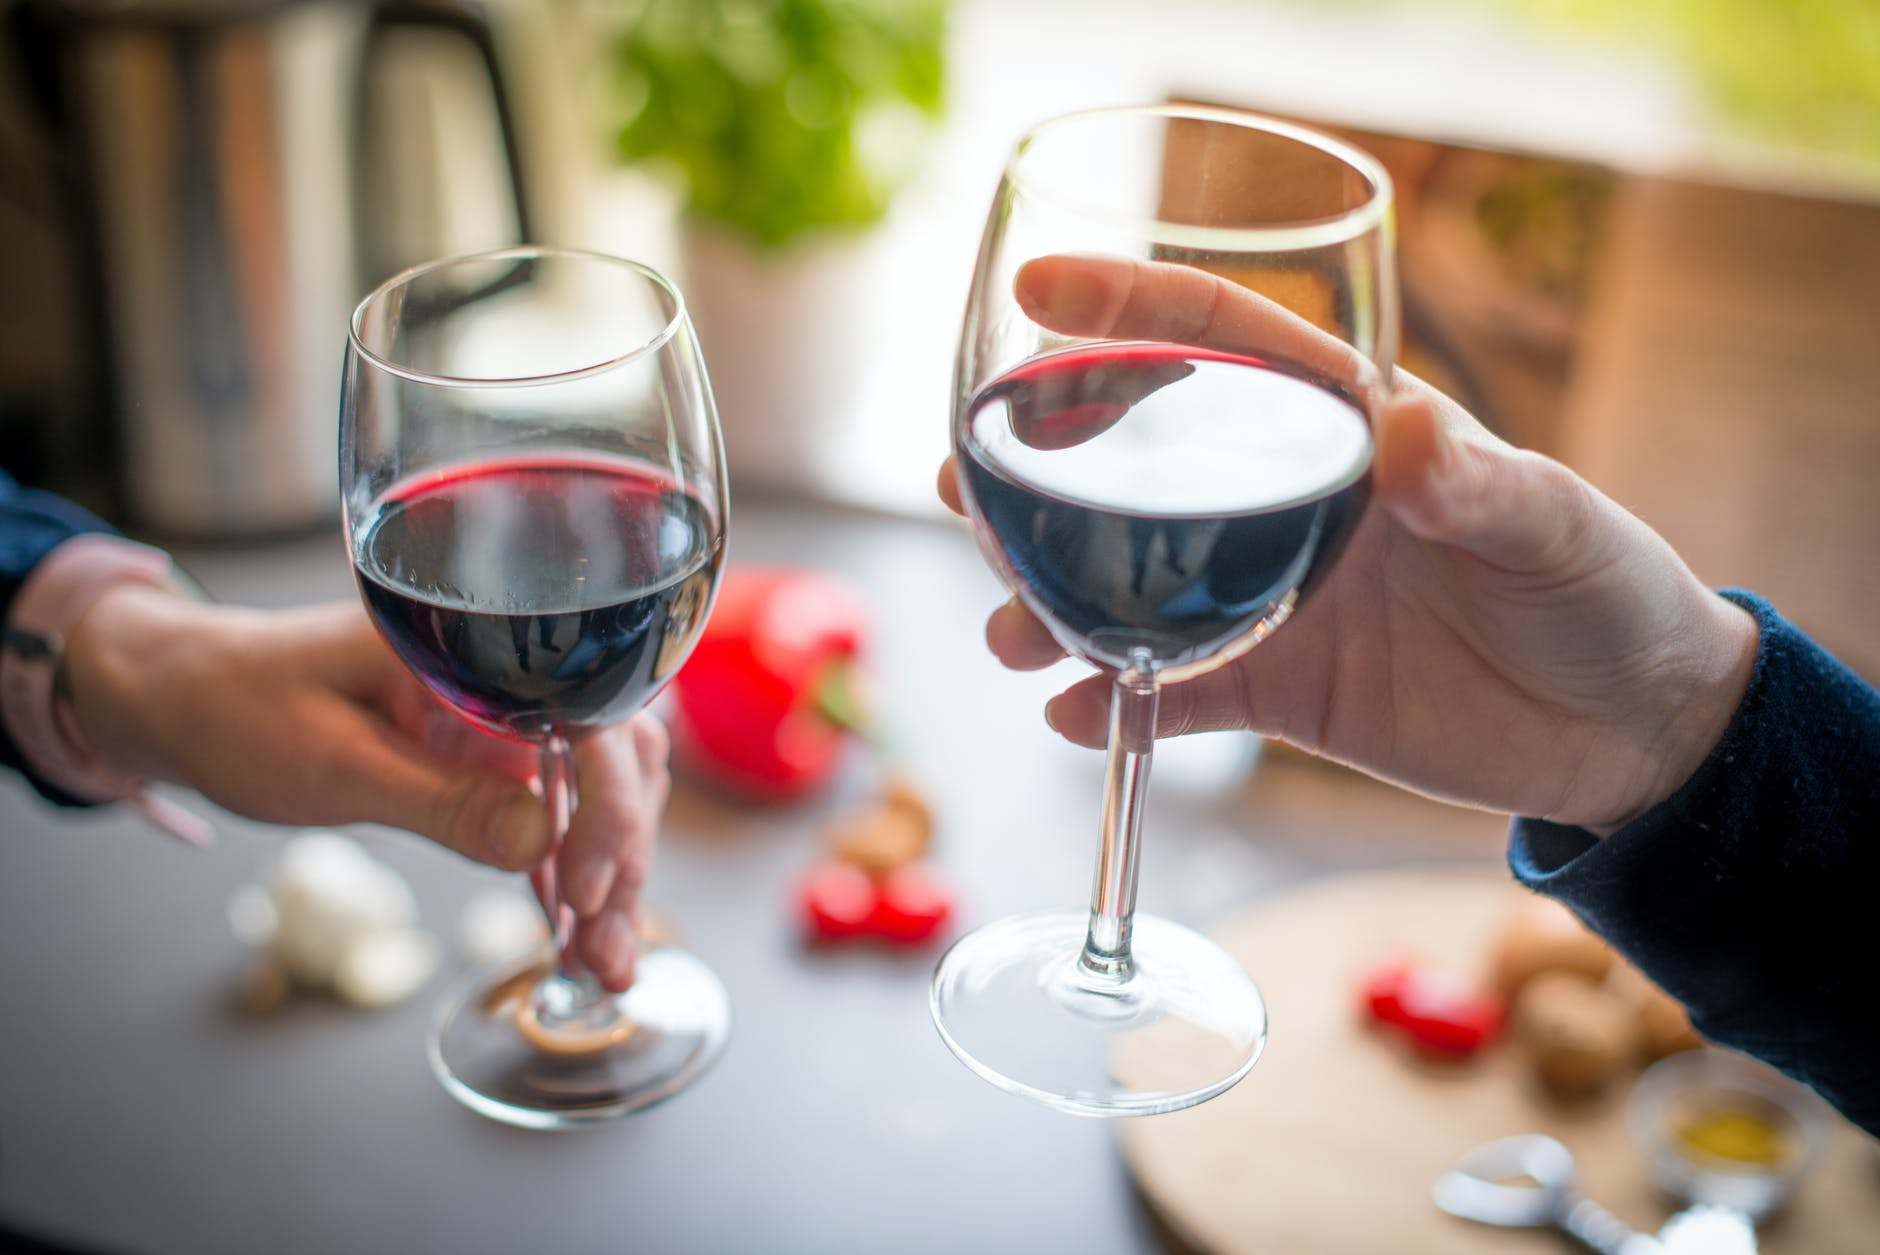

**Instructions:-**

**1. Import the dataset.**

**2. Data quality check:**
     
     a. Check if null values are present. If there are, drop those rows.

**3. Exploratory Data Analysis:**
     
     a. Univariate Analysis:
       
       i. Draw a minimum of 5 histograms .
       
       ii. Draw boxplots for each numerical columns.
     
     b. Bivariate analysis:
       
       i. Draw a minimum of 5 scatter plots

**4. Modelling:**
     
     a. Split the dataset using “train-test-split” function.
     
     b. Apply KNN classification on “quality” column of the dataset. Select the appropriate features
     
     c. Predict on the test set.
     
     d. Find out the accuracy.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

1. Importing the Dataset

In [3]:
dataset = pd.read_csv("/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")

In [4]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


2. Checking for NULL values.

In [5]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


3. Drawing 5 histograms .

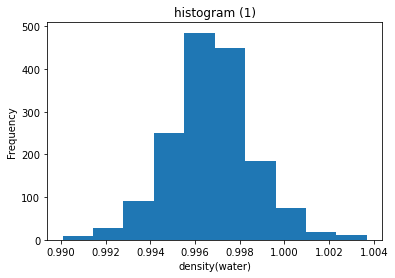

In [7]:
d = dataset['density']
bins = 10


plt.hist(d,bins)
plt.title("histogram (1)")
plt.xlabel("density(water)")
plt.ylabel("Frequency")
plt.show()

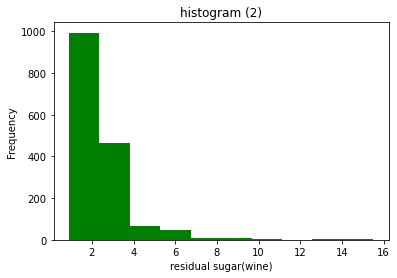

In [8]:
r = dataset['residual sugar']
bins = 10


plt.hist(r,bins,color = "green")
plt.title("histogram (2)")
plt.xlabel("residual sugar(wine)")
plt.ylabel("Frequency")
plt.show()

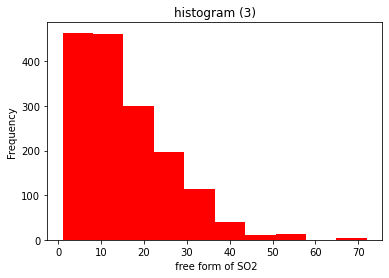

In [9]:
fsd = dataset['free sulfur dioxide']
bins = 10


plt.hist(fsd,bins,color = "red")
plt.title("histogram (3)")
plt.xlabel(" free form of SO2")
plt.ylabel("Frequency")
plt.show()

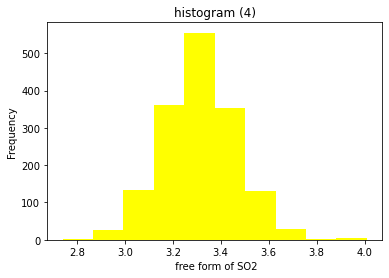

In [10]:
ph = dataset['pH']
bins = 10


plt.hist(ph,bins,color = "yellow")
plt.title("histogram (4)")
plt.xlabel(" pH of Wine")
plt.ylabel("Frequency")
plt.show()

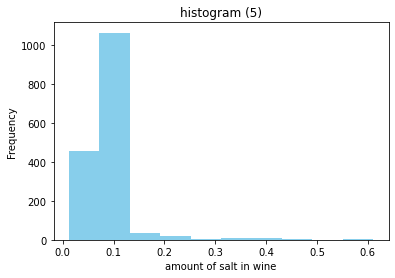

In [11]:
cl = dataset['chlorides']
bins = 10


plt.hist(cl,bins,color = "skyblue")
plt.title("histogram (5)")
plt.xlabel("amount of salt in wine")
plt.ylabel("Frequency")
plt.show()

3. ii) barplots of all the coloumns

Here i have called the FOR-LOOP so that it will run automatically all the plots of the given coloumns respective wise.

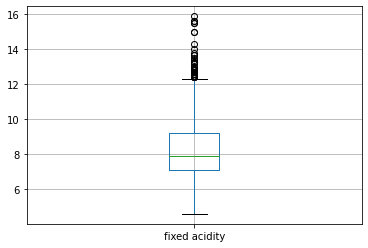

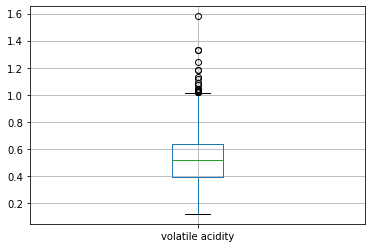

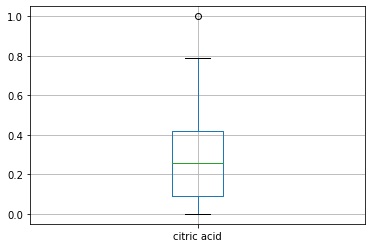

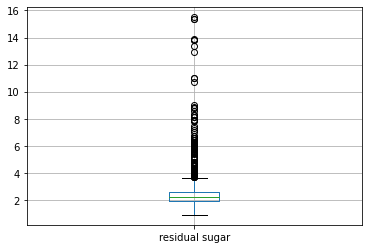

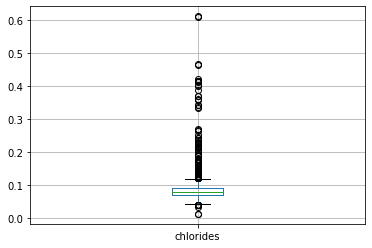

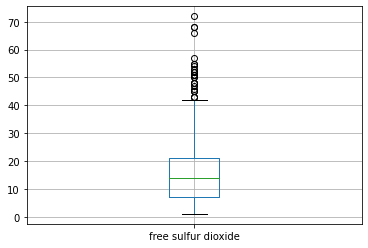

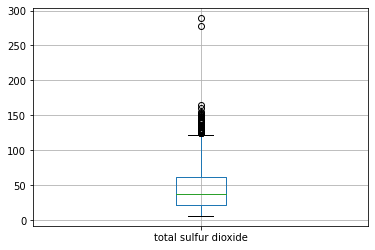

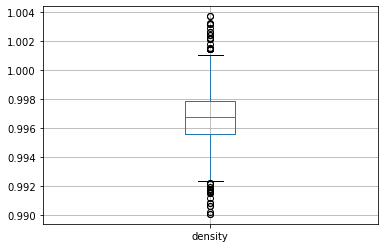

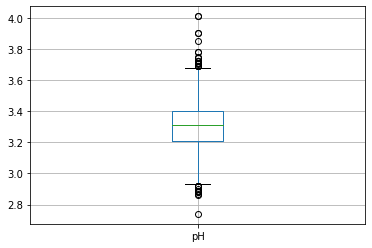

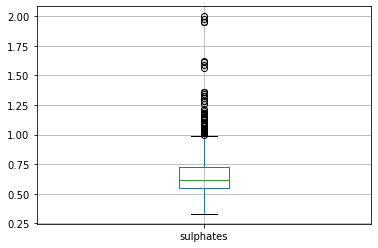

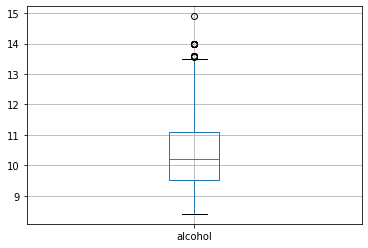

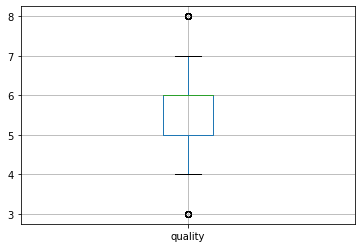

In [12]:
for cl in dataset:
    plt.figure()
    dataset.boxplot([cl])

3. b) 5 scatter plot using matplotlib

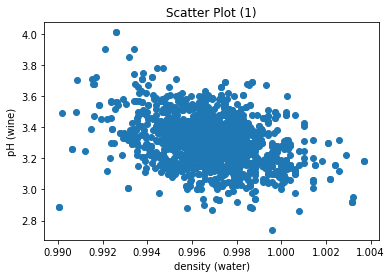

In [13]:
d = dataset["density"]
ph = dataset["pH"]

plt.scatter(d, ph)
plt.title("Scatter Plot (1)")
plt.xlabel("density (water)")
plt.ylabel("pH (wine)")
plt.show()

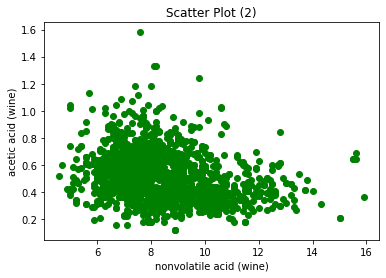

In [14]:
fa = dataset["fixed acidity"]
va = dataset["volatile acidity"]

plt.scatter(fa, va,color = 'green')
plt.title("Scatter Plot (2)")
plt.xlabel("nonvolatile acid (wine)")
plt.ylabel("acetic acid (wine)")
plt.show()

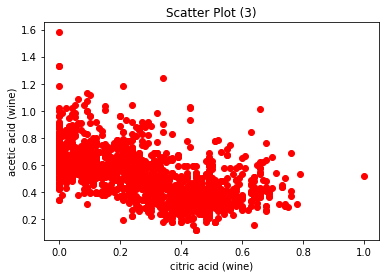

In [15]:
ca = dataset["citric acid"]
va = dataset["volatile acidity"]

plt.scatter(ca, va,color = 'red')
plt.title("Scatter Plot (3)")
plt.xlabel("citric acid (wine)")
plt.ylabel("acetic acid (wine)")
plt.show()

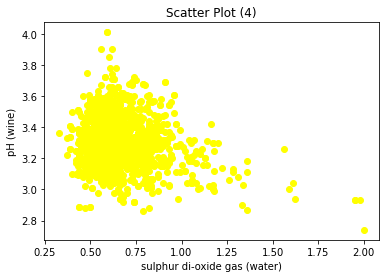

In [16]:
sl = dataset["sulphates"]
ph = dataset["pH"]

plt.scatter(sl, ph,color = 'yellow')
plt.title("Scatter Plot (4)")
plt.xlabel("sulphur di-oxide gas (water)")
plt.ylabel("pH (wine)")
plt.show()

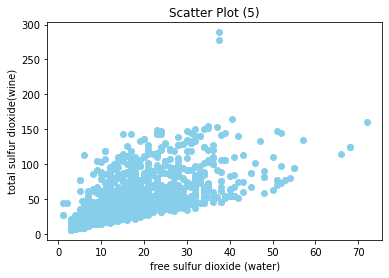

In [17]:
fsd = dataset["free sulfur dioxide"]
tsd = dataset["total sulfur dioxide"]

plt.scatter(fsd, tsd,color = 'skyblue')
plt.title("Scatter Plot (5)")
plt.xlabel("free sulfur dioxide (water)")
plt.ylabel("total sulfur dioxide(wine)")
plt.show()

4. Modelling the Data

Here I have took all the features which will help us to examine the quality of the certain Wine.

such as  *'citric acid' , 'alcohol' , 'residual sugar' , 'pH' , 'total sulfur dioxide'*

In [ ]:
features = ['citric acid','alcohol','residual sugar','pH','total sulfur dioxide']  #input values

x = dataset[features]
y = dataset['quality']                                                             #output values

In [ ]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
y= le.fit_transform(y)

Splitting of the data.

In [ ]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.10 , random_state=3,shuffle=True)

In [ ]:
s_c = StandardScaler()
train_x=s_c.fit_transform(train_x)
test_x=s_c.fit_transform(test_x)


In [ ]:
Knn = KNeighborsClassifier (n_neighbors=7,p=1)
Knn.fit(train_x,train_y)

In [ ]:
y_pred=Knn.predict(test_x)
y_pred

In [ ]:
test_y

In [ ]:
c_m = confusion_matrix(test_y,y_pred)
c_m

**Accuracy**

In [ ]:
print("Wrong values predicted out of total values : ")
print((test_y!=y_pred).sum(),'/',((test_y==y_pred).sum()+(test_y!=y_pred).sum()))

In [ ]:
print('percentage Accuracy using KNN is : ',100*accuracy_score(test_y,y_pred))